In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
OBS_CAT = np.loadtxt("obs.dat")
RND_CAT = np.loadtxt("random.cat")

In [4]:
z0 = 0      # Mpc/h

x_min, x_max = 0, 50
y_min, y_max = 0, 50

In [5]:
Xobs, Yobs, Zobs = OBS_CAT[:,0], OBS_CAT[:,1], OBS_CAT[:,2]

index_o = np.where( (abs(Zobs - z0)< 5.) &
                     (Xobs >= x_min) & (Xobs <= x_max) & 
                     (Yobs >= y_min) & (Yobs <= y_max))

x_o, y_o, z_o = Xobs[index_o], Yobs[index_o], Zobs[index_o]

Xrnd, Yrnd, Zrnd = RND_CAT[:,0], RND_CAT[:,1], RND_CAT[:,2]
index_r = np.where( (abs(Zrnd - z0)< 5) &
                     (Xrnd >= x_min) & (Xrnd <= x_max) & 
                     (Yrnd >= y_min) & (Yrnd <= y_max))

x_r, y_r, z_r = Xrnd[index_r], Yrnd[index_r], Zrnd[index_r]

In [6]:
zeros_o = np.zeros_like(z_o)
zeros_r = np.zeros_like(z_r)

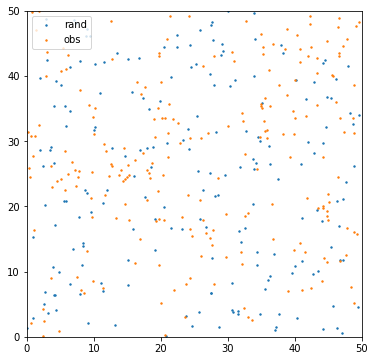

In [7]:
fig = plt.figure(figsize=(6,6))

plt.scatter(x_r, y_r, s = 2, label="rand")
plt.scatter(x_o, y_o, s = 2, label="obs")


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc=2)

In [8]:
ML = np.loadtxt("master.mls", delimiter=',',
                dtype=[('voidID', 'i8'), ('x', 'f8'), ('y', 'f8'), ('z', 'f8')] )

In [9]:
ML['voidID']

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,
         2,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   4,   4,
         4,   4,   4,   5,   5,   5,   5,   5,   5,   5,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   7,   7,   7,   7,
         7,   7,   7,   8,   8,   8,   8,   9,   9,   9,   9,   9,   9,
         9,   9,  10,  10,  10,  10,  10,  10,  10,  10,  10,  11,  11,
        11,  11,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  13,  13,  13,  13,  13,  14,  14,  14,  1

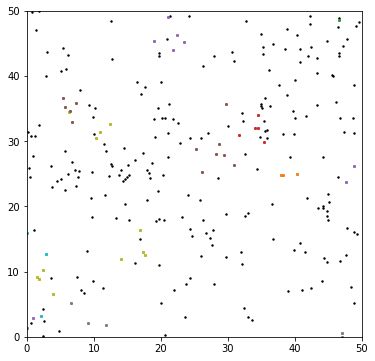

In [10]:
fig = plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.scatter(x_o, y_o, s=2, c="k")


plt.scatter(ML['x'], ML['y'], s=2,c='black')
plt.scatter(x_o, y_o, s=2,c='black')

for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    plt.scatter(ML['x'][index], ML['y'][index], s=4)

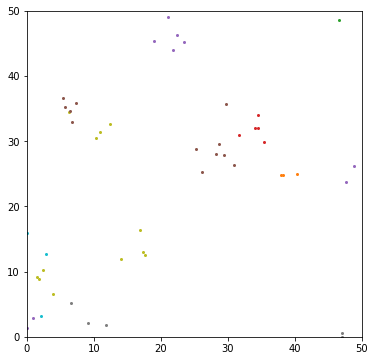

In [11]:
fig = plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.scatter(x_o, y_o, s=2, c="k")

for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    plt.scatter(ML['x'][index], ML['y'][index], s=4)

In [12]:
FULLCAT = np.loadtxt("full.cat", delimiter=" ",
                     dtype=[("x", "f8"), ("y", "f8"), ("z", "f8")])

In [13]:
fcBSkel = np.loadtxt("index.BSKIndex", delimiter=" ",
                     dtype=[("Origin", "i8"), ("End", "i8")])

In [14]:
N_random = x_r.shape[0]
N_halos = x_o.shape[0]
print(N_random,N_halos)

195 226


In [15]:
index_rr = np.where( (fcBSkel["Origin"] < N_random) & (fcBSkel["End"]  < N_random) )

In [16]:
fcBSkel[index_rr]["End"]

array([156, 174, 132, 102,  82, 119, 189, 112, 149, 133, 143, 145, 191])

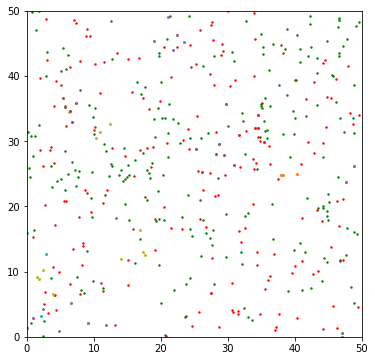

In [17]:
fig = plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.scatter(x_o, y_o, s=2, c="k")

plt.scatter(x_r, y_r, s = 2, label="rand",c='red')
plt.scatter(x_o, y_o, s = 2, label="obs",c='green')

for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    plt.scatter(ML['x'][index], ML['y'][index], s=4)

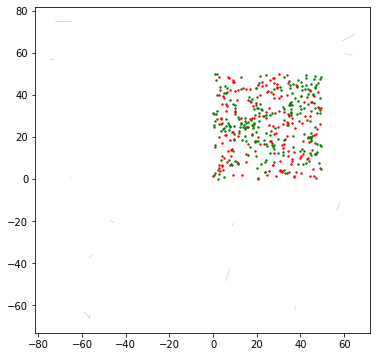

In [18]:
fig = plt.figure(figsize=(6,6))
plt.scatter(x_r, y_r, s = 2, label="rand",c='red')
plt.scatter(x_o, y_o, s = 2, label="obs",c='green')
plt.plot( [FULLCAT[fcBSkel[index_rr]["Origin"]]["x"], 
               FULLCAT[fcBSkel[index_rr]["End"]]["x"]], 
              [FULLCAT[fcBSkel[index_rr]["Origin"]]["y"], 
               FULLCAT[fcBSkel[index_rr]["End"]]["y"]], lw=1, c="gray", alpha=0.3)

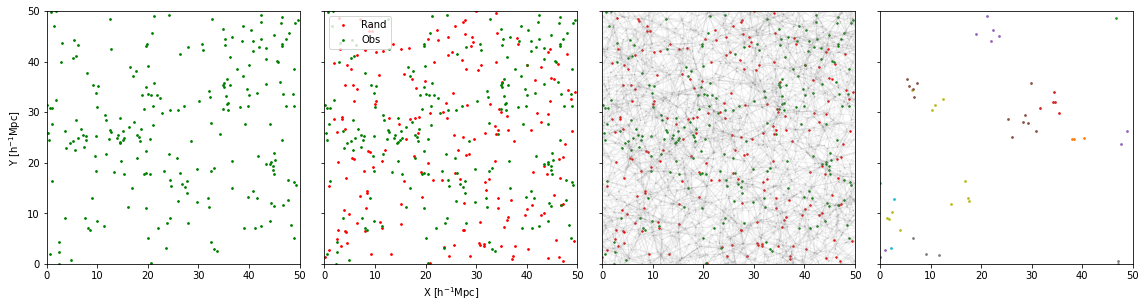

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,4), sharey=True)


ax[0].scatter(x_o, y_o, s = 3, label="Obs",c='green')
ax[0].set_ylabel(r"Y [$\rm h^{-1} Mpc$]")


ax[1].scatter(x_r, y_r, s = 3, label="Rand",c='red')
ax[1].scatter(x_o, y_o, s = 3, label="Obs",c='green')
ax[1].legend(loc=2)
ax[1].set_xlabel(r"X [$\rm h^{-1} Mpc$]")


ax[2].plot( [FULLCAT[fcBSkel[:]["Origin"]]["x"], 
               FULLCAT[fcBSkel[:]["End"]]["x"]], 
              [FULLCAT[fcBSkel[:]["Origin"]]["y"], 
               FULLCAT[fcBSkel[:]["End"]]["y"]], lw=1, c="gray", alpha=0.1)
ax[2].scatter(x_r, y_r, s = 2, label="rand",c='red')
ax[2].scatter(x_o, y_o, s = 2, label="obs",c='green')


for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    ax[3].scatter(ML['x'][index], ML['y'][index], s=3)

    
for i in index_rr:
    ax[3].plot( [FULLCAT[fcBSkel[i]["Origin"]]["x"], 
               FULLCAT[fcBSkel[i]["End"]]["x"]], 
              [FULLCAT[fcBSkel[i]["Origin"]]["y"], 
               FULLCAT[fcBSkel[i]["End"]]["y"]], lw=1, c="gray", alpha=0.3)


for i in range(4):
    ax[i].set_xlim(x_min, x_max)
    ax[i].set_ylim(y_min, y_max)
    ax[i].set(aspect=1)

plt.tight_layout(pad=0.5)